<a href="https://colab.research.google.com/github/Harshbhatt2409/Aspect-Based-Sentiment-Analysis-using-Syntactic-Parsing/blob/main/a1872953_ANLP_Assignement_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**a1872953**

**Harsh Alpesh Bhatt**

**Applied Natural Language Processing Assignment 3**

**Task: Building an aspect-based sentiment analysis algorithm based on syntactic parsing**

In [ ]:
# Importing the required libraries

import pandas as pd
import re as re
import numpy as np

### Data Loading and Text Preprocessing

Opening the file and giving it the read Command

In [ ]:
location_of_file = "/content/Restaurants.xml"
fileRestaurant = open(location_of_file, "r")
print(fileRestaurant.read())
fileRestaurant.close()

<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<sentences>
    <sentence id="3121">
        <text>But the staff was so horrible to us.</text>
        <aspectTerms>
            <aspectTerm term="staff" polarity="negative" from="8" to="13"/>
        </aspectTerms>
        <aspectCategories>
            <aspectCategory category="service" polarity="negative"/>
        </aspectCategories>
    </sentence>
    <sentence id="2777">
        <text>To be completely fair, the only redeeming factor was the food, which was above average, but couldn't make up for all the other deficiencies of Teodora.</text>
        <aspectTerms>
            <aspectTerm term="food" polarity="positive" from="57" to="61"/>
        </aspectTerms>
        <aspectCategories>
            <aspectCategory category="food" polarity="positive"/>
            <aspectCategory category="anecdotes/miscellaneous" polarity="negative"/>
        </aspectCategories>
    </sentence>
    <sentence id="1634">
        <text>The food

we will define a function to parse the given XML file

In [ ]:
def parsing_file(root):
 reviews_of_customers = []
 Count_of_reviews = 0
 for sentence in root.findall("sentence"):
  category_of_aspects = []
  entrypoint = {}
  terms_of_aspect = []
  count_of_reviews = 0
  terms_aspect="aspectTerms"
  if sentence.find(terms_aspect):
    term_aspect = "aspectTerm"
    for term_of_aspect in sentence.find(terms_aspect).findall(term_aspect):
      polarity = "polarity"
      terms_of_aspect.append((term_of_aspect.get("term"), term_of_aspect.get(polarity)))
  category_aspect = "aspectCategories"
  count_of_aspects = 0
  if sentence.find(category_aspect):
    for category_of_aspect in sentence.find(category_aspect).findall("aspectCategory"):
       category_of_aspects.append((category_of_aspect.get("category"), category_of_aspect.get(polarity)))
  entrypoint["sentence"] = sentence[0].text
  entrypoint["terms"] = terms_of_aspect
  entrypoint["aspects"] = category_of_aspects

  reviews_of_customers.append(entrypoint)

 review_customer_df = pd.DataFrame(reviews_of_customers)
 return review_customer_df


Now we will form one Tree and that will act as the Root, the main_data file will stay as the root of the tree

In [ ]:
import xml.etree.ElementTree as parsing_ET
tree = parsing_ET.parse('/content/Restaurants.xml')
main_data = tree.getroot()

We will now parse the main_data using the parsing function we just defined

In [ ]:
df = parsing_file(main_data)

In [ ]:
df.head()

,sentence,terms,aspects
0,But the staff was so horrible to us.,"[(staff, negative)]","[(service, negative)]"
1,"To be completely fair, the only redeeming fact...","[(food, positive)]","[(food, positive), (anecdotes/miscellaneous, n..."
2,"The food is uniformly exceptional, with a very...","[(food, positive), (kitchen, positive), (menu,...","[(food, positive)]"
3,Where Gabriela personaly greets you and recomm...,[],"[(service, positive)]"
4,"For those that go once and don't enjoy it, all...",[],"[(anecdotes/miscellaneous, positive)]"


Creating a copy of the dataset

In [ ]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [ ]:
df1.head()

,sentence,terms,aspects
0,But the staff was so horrible to us.,"[(staff, negative)]","[(service, negative)]"
1,"To be completely fair, the only redeeming fact...","[(food, positive)]","[(food, positive), (anecdotes/miscellaneous, n..."
2,"The food is uniformly exceptional, with a very...","[(food, positive), (kitchen, positive), (menu,...","[(food, positive)]"
3,Where Gabriela personaly greets you and recomm...,[],"[(service, positive)]"
4,"For those that go once and don't enjoy it, all...",[],"[(anecdotes/miscellaneous, positive)]"


In [ ]:
df2.head()

,sentence,terms,aspects
0,But the staff was so horrible to us.,"[(staff, negative)]","[(service, negative)]"
1,"To be completely fair, the only redeeming fact...","[(food, positive)]","[(food, positive), (anecdotes/miscellaneous, n..."
2,"The food is uniformly exceptional, with a very...","[(food, positive), (kitchen, positive), (menu,...","[(food, positive)]"
3,Where Gabriela personaly greets you and recomm...,[],"[(service, positive)]"
4,"For those that go once and don't enjoy it, all...",[],"[(anecdotes/miscellaneous, positive)]"


In [ ]:
df3.head()

,sentence,terms,aspects
0,But the staff was so horrible to us.,"[(staff, negative)]","[(service, negative)]"
1,"To be completely fair, the only redeeming fact...","[(food, positive)]","[(food, positive), (anecdotes/miscellaneous, n..."
2,"The food is uniformly exceptional, with a very...","[(food, positive), (kitchen, positive), (menu,...","[(food, positive)]"
3,Where Gabriela personaly greets you and recomm...,[],"[(service, positive)]"
4,"For those that go once and don't enjoy it, all...",[],"[(anecdotes/miscellaneous, positive)]"


we will export this data in CSV form so that we could figure out the positive values

In [ ]:
df1.to_csv(r'pos_data.csv', index = False)

In [ ]:
pos = pd.read_csv('/content/pos_data.csv')

In [ ]:
pos.head()

,sentence,terms,aspects
0,But the staff was so horrible to us.,"[('staff', 'negative')]","[('service', 'negative')]"
1,"To be completely fair, the only redeeming fact...","[('food', 'positive')]","[('food', 'positive'), ('anecdotes/miscellaneo..."
2,"The food is uniformly exceptional, with a very...","[('food', 'positive'), ('kitchen', 'positive')...","[('food', 'positive')]"
3,Where Gabriela personaly greets you and recomm...,[],"[('service', 'positive')]"
4,"For those that go once and don't enjoy it, all...",[],"[('anecdotes/miscellaneous', 'positive')]"


In [ ]:
pos.shape

(3041, 3)

The total number of positive detected sentences are 1794

In [ ]:
sentences_detected_positive = 1794

We will now apply the text preprocessing steps

In [ ]:
# defining function to convert to lower case
def lower(data):
  return data.lower()

In [ ]:
df1['sentence'] = df1['sentence'].apply(lower)

In [ ]:
df1['sentence'][0]

'but the staff was so horrible to us.'

Removing HTML Tags

In [ ]:
# defining function to remove HTML tags
def html_tags(data):
  clean = re.compile("<.*?>")
  return re.sub(clean, '', data)

In [ ]:
df1['sentence'] = df1['sentence'].apply(html_tags)

In [ ]:
df1['sentence'][0]

'but the staff was so horrible to us.'

Removing Special Characters

In [ ]:
#function to remove special characters
def special_character_removal(data):
  g = ''
  for t in data:
    if t.isalnum():
      g = g + t
    else:
      g = g + ' '
  return g

Applying the function

In [ ]:
df1['sentence'] = df1['sentence'].apply(special_character_removal)

Checking for results

In [ ]:
df1['sentence'][0]

'but the staff was so horrible to us '

Removing all the Stop Words

In [ ]:
#function to remove stop words
#we will use the nltk library for this process
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#specifing the predefined stopwords library to find stopwords in english language
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df1['sentence'] = df1['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [ ]:
df1['sentence'][0]

'staff horrible us'

###Rule 1

Now after Preprocessing lets move to Aspect based Syntactic Parsing part

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

we will now define a class for classfication

In [ ]:
class Embedding_Classifier:
  def __init__(self, nlp, classes:list, threshold: int=0.5):
    self.classes = classes
    self.class_spans = [nlp(item)[:] for item in classes]
    self.cls = None
    self.threshold = threshold
    self.nlp = nlp

  def prediction(self, items:list):
    class_predicted = set()
    count_of_classes = 0
    for item in items:
      similarity_in_class = [nlp(item)[:].similarity(item_of_class) for item_of_class in self.class_spans]
      maximum_index = np.argmax(similarity_in_class)
      if similarity_in_class[maximum_index] > self.threshold:
        class_predicted.add(self.classes[maximum_index])

    return list(class_predicted)

We will now set the dataset

In [ ]:
setting_data = set(df1.aspects.apply(lambda x: [item[0] for item in x]).sum())

printing the set data we just defined

In [ ]:
print(setting_data)

{'service', 'ambience', 'price', 'anecdotes/miscellaneous', 'food'}


According to the above result we can define the different sets of aspects in the dataset

In [ ]:
classes_of_aspect = ['ambience', 'miscellaneous', 'food', 'price', 'service']

We will now use the above mentioned classifier function to class the aspects

In [ ]:
classifier = Embedding_Classifier(nlp=nlp, classes = classes_of_aspect, threshold=0.5)

Checking how the data has changed

In [ ]:
df1.head()

,sentence,terms,aspects
0,staff horrible us,"[(staff, negative)]","[(service, negative)]"
1,completely fair redeeming factor food average ...,"[(food, positive)]","[(food, positive), (anecdotes/miscellaneous, n..."
2,food uniformly exceptional capable kitchen pro...,"[(food, positive), (kitchen, positive), (menu,...","[(food, positive)]"
3,gabriela personaly greets recommends eat,[],"[(service, positive)]"
4,go enjoy say get,[],"[(anecdotes/miscellaneous, positive)]"


Now I have imported a text file with Positive tokens and Negative tokens

Defining the function to load this dataset

In [ ]:
def positive_negative_load(path: str):
  list_of_words = []
  with open(path, 'r', encoding="ISO-8859-1") as file:
    for line in file.readlines():
      if line.strip():
        list_of_words.append(line.lower().strip())

    return set(list_of_words)

We will now load the positive and negative list of words using the function we just created.

In [ ]:
listof_positive_w = positive_negative_load('/content/positive_list.txt')
print(listof_positive_w)

{'sleek', 'exceptional', 'courageousness', 'imaculate', 'brilliant', 'relaxed', 'fanfare', 'feature-rich', 'aspiration', 'valuable', 'luck', 'brilliances', 'reputable', 'conciliatory', 'amenable', 'eulogize', 'joyously', 'smiling', 'thrifty', 'suave', 'vivacious', 'powerfully', 'rapid', 'exaltingly', 'intriguingly', 'sustainable', 'laudably', 'snappy', 'masterpieces', 'well-mannered', 'blameless', 'advocates', 'playfully', 'mastery', 'nicest', 'danke', 'enthralled', 'excitement', 'applaud', 'gratifying', 'reasonably', 'well-known', 'temptingly', 'evenly', 'fervidly', 'likes', 'god-send', 'right', 'humor', 'trustworthy', 'decency', 'inexpensive', 'restful', 'dignified', 'gains', 'user-friendly', 'irreproachable', 'roomy', 'laud', 'oasis', 'bravo', 'strong', 'toll-free', 'fortunate', 'achievements', 'benefactor', 'well-regarded', 'significant', 'respectfully', 'serene', 'astound', 'breakthrough', 'exultingly', 'generosity', 'destiny', 'peach', 'angelic', 'reaffirm', 'spellbind', 'stylish

In [ ]:
listof_negative_w = positive_negative_load('/content/negative_list.txt')
print(listof_negative_w)

{'extravagantly', 'naï¿½ve', 'unwieldy', 'cowardly', 'slogging', 'brashness', 'contamination', 'domineering', 'solemn', 'repressive', 'downfall', 'egotism', 'harbors', 'lapses', 'scarce', 'unexplained', 'brusque', 'inanely', 'refuting', 'sorely', 'inequitably', 'extinguish', 'unhappy', 'inflammed', 'desecrate', 'defile', 'menial', 'besiege', 'drunkard', 'hurts', 'cruelness', 'disrespectablity', 'rivalry', 'untimely', 'distract', 'prosecute', 'aggravate', 'defiantly', 'dispirited', 'worrisome', 'conspicuously', 'smear', 'smut', 'clogs', 'beset', 'provoke', 'drab', 'miscalculate', 'adamant', 'perilously', 'sloppily', 'stuttering', 'syndrome', 'scramble', 'ingrate', 'stole', 'drained', 'apprehensive', 'blind', 'bs', 'cussed', 'absence', 'discontentedly', 'hell', 'embarrassingly', 'flak', 'hellion', 'involuntary', 'irritably', 'rigidity', 'inactive', 'tedious', 'famine', 'mawkishness', 'squabble', 'servitude', 'snappishly', 'hapless', 'arrogantly', 'disappoints', 'leaks', 'glibly', 'pleas'

Implementting Rule 1

Advmod -> adverbial modifier

Amod -> adjective modifier

In [ ]:
def rule_1_of_sentimentanalysis(sentence: str, pos: set, neg: set):
  dictionary_sentence = dict()
  sentence = nlp(sentence)
  advmod = "advmod"
  amod = "amod"
  count_of_sentence = 0
  for token in sentence:
    if token.text in neg or token.text in pos:
      sentiment = 1 if token.text in pos else -1
      if(token.dep_ == advmod):
        continue
      elif(token.dep_ == amod):
        dictionary_sentence[token.head.text] = sentiment

  return dictionary_sentence

Implementing Rule 2

Advmod -> adverbial modifier

Amod -> adjective modifier

VERB

dobj -> deirect object

In [ ]:
def rule_2_of_sentimentanalysis(sentence: str, pos: set, neg: set):
  dictionary_sentence = dict()
  sentence = nlp(sentence)
  dsen = None
  advmod = "advmod"
  amod = "amod"
  count_of_sentence1 = 0
  for token in sentence:
    if token.text in neg or token.text in pos:
      sentiment = 1 if token.text in pos else -1
      if(token.dep_ == advmod):
        continue
      elif(token.dep_ == amod):
        dictionary_sentence[token.head.text] = sentiment
      else:
        adverb = None
        count_of_adverb = 0
        for child in token.children:
          verb = "VERB"
          direct_object = "dobj"
          if (token.pos_ == verb) & (child.dep_ == direct_object):
            dictionary_sentence[child.text] = sentiment
            adverb
            count_of_subchildren1 = 0
            subchildren = []
            is_conjunction = False
            for subchild in child.children:
              aand = "and"
              if subchild.text == aand:
                adverb
                is_conjunction = False
              if is_conjunction and subchild.text != aand:
                subchildren.append(subchild.text)
                adverb
                is_conjunction = False
            for subchild in subchildren:
              dictionary_sentence[subchild] = sentiment

  return dictionary_sentence

Implementing Rule 3

Advmod -> adverbial modifier

Amod -> adjective modifier

VERB

dobj -> deirect object

Compound

Noun

In [ ]:
def rule_3_of_sentimentanalysis(sentence: str, pos: set, neg: set):
  dictionary_sentence = dict()
  sentence = nlp(sentence)
  advmod = "advmod"
  amod = "amod"
  count_of_sentence2 = 0
  for token in sentence:
    if token.text in neg or token.text in pos:
      sentiment = 1 if token.text in pos else -1
      if(token.dep_ == advmod):
        continue
      elif(token.dep_ == amod):
        dictionary_sentence[token.head.text] = sentiment
      else:
        adverb = None
        count_of_adverb = 0
        for child in token.children:
          verb = "VERB"
          direct_object = "dobj"
          if (token.pos_ == verb) & (child.dep_ == direct_object):
            dictionary_sentence[child.text] = sentiment
            adverb
            count_of_subchildren = 0
            subchildren = []
            is_conjunction = False
            for subchild in child.children:
              aand = "and"
              if subchild.text == aand:
                adverb
                is_conjunction = False
              if is_conjunction and subchild.text != aand:
                subchildren.append(subchild.text)
                adverb
                is_conjunction = False
            for subchild in subchildren:
              dictionary_sentence[subchild] = sentiment
        for child in token.head.children:
          compound = "compound"
          noun = ""
          adverbs = None
          Count_od_subchildren2 = 0
          Noun = "NOUN"
          if(child.pos_ == Noun) and (child.text not in dictionary_sentence):
            noun = child.text
            adverbs
            for subchild in child.children:
              adverbs
              if subchild.dep_ == compound:
                noun = subchild.text + " " + noun
            dictionary_sentence[noun] = sentiment


  return dictionary_sentence

we will now apply the sentiment analysis rule 1 on the dataset 1

In [ ]:
df1.sentence.head().apply(lambda x: rule_1_of_sentimentanalysis(sentence = x, pos = listof_positive_w, neg = listof_negative_w))

0                             {}
1    {'average': 1, 'factor': 1}
2                 {'kitchen': 1}
3                             {}
4                             {}
Name: sentence, dtype: object

We will now create a function for Aspect Based Sentiment Analysis

In [ ]:
class aspectbasedSentiAna:
  def __init__ (self, nlp, aspects: list, negative_opinions: list, positive_opinions: list, threshold: int):
    self.classifier = Embedding_Classifier(nlp=nlp, classes = aspects, threshold = threshold)
    negative_op = None
    self.negative_opinions = negative_opinions
    self.positive_opinions = positive_opinions
    self.nlp = nlp

  def analysis(self, text):
    sentiments_of_aspects = {}
    for sentence in self.nlp(text).sents:
      for feature, value_of_sentiment in rule_1_of_sentimentanalysis(sentence=sentence.text, pos = self.positive_opinions, neg = self.negative_opinions).items():
        prediction_of_aspect = self.classifier.prediction([feature])
        if prediction_of_aspect:
          sentiments_of_aspects[prediction_of_aspect[0]] = sentiments_of_aspects.get(prediction_of_aspect[0], 0) + value_of_sentiment
    self.negative_opinions
    return sentiments_of_aspects

We will now apply the function we created to the dataset 1

In [ ]:
sentiment_analysis = aspectbasedSentiAna(nlp=nlp, aspects=classes_of_aspect, negative_opinions= listof_negative_w, positive_opinions= listof_positive_w, threshold=0.5)

Prediction function

In [ ]:
def prediction_func(prediction):
  return [(item if item != 'miscellaneous' else 'anecdotes/miscellaneous', "positive" if value > 0 else 'neutral' if value == 0 else "negative")
  for item, value in prediction.items()]

Defining a function to get the confusion values

In [ ]:
def confusion_matrix_values(label, prediction):
  result = None
  if not label:
    if not prediction:
      result = 'True_Negative'
    else:
      result = 'False_Positive'
  else:
    if not prediction:
      result = 'False_Negative'
    else:
      prediction_convert = prediction_func(prediction)
      result = 'True_Positive'
      for item in label:
        if item in prediction_convert or item[0] == 'anecdotes/miscellaneous':
          pass
        else:
          result = 'False_Negative'
          break

  return result

In [ ]:
def confusion_matrix_data(labels, predictions):
  confusion_matrix = {}
  for label, prediction in zip(labels, predictions):
    value_of_confusion = confusion_matrix_values(label, prediction)
    confusion_matrix[value_of_confusion] = confusion_matrix.get(value_of_confusion, 0) + 1
  return confusion_matrix

Checking the different aspects of the dataset

In [ ]:
df1.aspects

0                                   [(service, negative)]
1       [(food, positive), (anecdotes/miscellaneous, n...
2                                      [(food, positive)]
3                                   [(service, positive)]
4                   [(anecdotes/miscellaneous, positive)]
                              ...                        
3036                [(anecdotes/miscellaneous, positive)]
3037                                   [(food, positive)]
3038                 [(anecdotes/miscellaneous, neutral)]
3039                                    [(food, neutral)]
3040                 [(anecdotes/miscellaneous, neutral)]
Name: aspects, Length: 3041, dtype: object

Creating a series of all the aspects

In [ ]:
pd.Series(sentiment_analysis.analysis(text) for text in df1.sentence.head())

<ipython-input-29-2aba6c4c0a39>:13: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity_in_class = [nlp(item)[:].similarity(item_of_class) for item_of_class in self.class_spans]


0                                    {}
1    {'miscellaneous': 1, 'service': 1}
2                        {'service': 1}
3                                    {}
4                                    {}
dtype: object

checking for the results

In [ ]:
sentiment_analysis

Applying the function to the dataset

In [ ]:
df1.loc[:, 'predictions'] = df1.sentence.apply(sentiment_analysis.analysis)

<ipython-input-29-2aba6c4c0a39>:13: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity_in_class = [nlp(item)[:].similarity(item_of_class) for item_of_class in self.class_spans]


Checking for the predictions

In [ ]:
df1.predictions.head()

0                                    {}
1    {'miscellaneous': 1, 'service': 1}
2                        {'service': 1}
3                                    {}
4                                    {}
Name: predictions, dtype: object

Getting the Confusion Matrix of the Results

In [ ]:
confusion_matrix_results = confusion_matrix_data(df1.aspects.values.tolist(), df1.predictions.values.tolist())

Results of the Confusion Matrix

In [ ]:
confusion_matrix_results

{'False_Negative': 2704, 'True_Positive': 337}

Confusion Matrix Values for Rule 1:
False_Nrgative = 2704, True_Positive = 337

Now we will do the same for Rule 2 and 3 to get the values of False_Negative and True_Positive for these rules.

Comment: Maybe make a copy of the original dataset and then do the same steps for rule 2 and 3

### Rule 2

######Text Preprocessing for df2

Applying the lower casing function

In [ ]:
df2['sentence'] = df2['sentence'].apply(lower)

Checking the results

In [ ]:
df2['sentence'][0]

'but the staff was so horrible to us.'

Applying the function to remove HTML tags

In [ ]:
df2['sentence'] = df2['sentence'].apply(html_tags)

Checking the results

In [ ]:
df2['sentence'][0]

'but the staff was so horrible to us.'

Applying the function to remove special characters

In [ ]:
df2['sentence'] = df2['sentence'].apply(special_character_removal)

Checking the results

In [ ]:
df2['sentence'][0]

'but the staff was so horrible to us '

Applying the function to remove stopwords

In [ ]:
df2['sentence'] = df2['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

Checking the results

In [ ]:
df2['sentence'][0]

'staff horrible us'

####Implementation of Rule 2

In [ ]:
setting_data_2 = set(df2.aspects.apply(lambda x: [item[0] for item in x]).sum())

In [ ]:
print(setting_data_2)

{'service', 'ambience', 'price', 'anecdotes/miscellaneous', 'food'}


Applyinng the Rule 2 on the dataset

In [ ]:
df2.sentence.head().apply(lambda x: rule_2_of_sentimentanalysis(sentence = x, pos = listof_positive_w, neg = listof_negative_w))

0                             {}
1    {'average': 1, 'factor': 1}
2                 {'kitchen': 1}
3                             {}
4                             {}
Name: sentence, dtype: object

Creating a class for Aspect based Sentiment Analysis for df2

In [ ]:
class aspectbasedSentiAna1:
  def __init__ (self, nlp, aspects: list, negative_opinions: list, positive_opinions: list, threshold: int):
    self.classifier = Embedding_Classifier(nlp=nlp, classes = aspects, threshold = threshold)
    negative_op = None
    self.negative_opinions = negative_opinions
    self.positive_opinions = positive_opinions
    self.nlp = nlp

  def analysis(self, text):
    sentiments_of_aspects = {}
    for sentence in self.nlp(text).sents:
      for feature, value_of_sentiment in rule_2_of_sentimentanalysis(sentence=sentence.text, pos = self.positive_opinions, neg = self.negative_opinions).items():
        prediction_of_aspect = self.classifier.prediction([feature])
        if prediction_of_aspect:
          sentiments_of_aspects[prediction_of_aspect[0]] = sentiments_of_aspects.get(prediction_of_aspect[0], 0) + value_of_sentiment
    self.negative_opinions
    return sentiments_of_aspects

Applying the function we created on the dataset

In [ ]:
sentiment_analysis = aspectbasedSentiAna1(nlp=nlp, aspects=classes_of_aspect, negative_opinions= listof_negative_w, positive_opinions= listof_positive_w, threshold=0.5)

Checking the aspects of the dataset

In [ ]:
df2.aspects

0                                   [(service, negative)]
1       [(food, positive), (anecdotes/miscellaneous, n...
2                                      [(food, positive)]
3                                   [(service, positive)]
4                   [(anecdotes/miscellaneous, positive)]
                              ...                        
3036                [(anecdotes/miscellaneous, positive)]
3037                                   [(food, positive)]
3038                 [(anecdotes/miscellaneous, neutral)]
3039                                    [(food, neutral)]
3040                 [(anecdotes/miscellaneous, neutral)]
Name: aspects, Length: 3041, dtype: object

Making a Series of all the aspects

In [ ]:
pd.Series(sentiment_analysis.analysis(text) for text in df2.sentence.head())

<ipython-input-29-2aba6c4c0a39>:13: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity_in_class = [nlp(item)[:].similarity(item_of_class) for item_of_class in self.class_spans]


0                                    {}
1    {'miscellaneous': 1, 'service': 1}
2                        {'service': 1}
3                                    {}
4                                    {}
dtype: object

Checking the results

In [ ]:
sentiment_analysis

Applying everything on the dataset

In [ ]:
df2.loc[:, 'predictions'] = df2.sentence.apply(sentiment_analysis.analysis)

<ipython-input-29-2aba6c4c0a39>:13: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity_in_class = [nlp(item)[:].similarity(item_of_class) for item_of_class in self.class_spans]


Checking the predictions

In [ ]:
df2.predictions.head()

0                                    {}
1    {'miscellaneous': 1, 'service': 1}
2                        {'service': 1}
3                                    {}
4                                    {}
Name: predictions, dtype: object

Defining confusion matrix values for the results after applying rules

In [ ]:
confusion_matrix_results2 = confusion_matrix_data(df2.aspects.values.tolist(), df2.predictions.values.tolist())

checking the confusion matrix results

In [ ]:
confusion_matrix_results2

{'False_Negative': 2656, 'True_Positive': 385}

Confusion Matrix Values for Rule 2: False_Negative = 2656, True_Positive = 385

###Rule 3

######Text Preprocessing for df3

Applying the lower casing function

In [ ]:
df3['sentence'] = df3['sentence'].apply(lower)

Checking the results

In [ ]:
df3['sentence'][0]

'but the staff was so horrible to us.'

Applying the function to remove HTML tags

In [ ]:
df3['sentence'] = df3['sentence'].apply(html_tags)

Checking the results

In [ ]:
df3['sentence'][0]

'but the staff was so horrible to us.'

Applying the function to remove special characters

In [ ]:
df3['sentence'] = df3['sentence'].apply(special_character_removal)

Checking the results

In [ ]:
df3['sentence'][0]

'but the staff was so horrible to us '

Applying the function for stop words removal

In [ ]:
df3['sentence'] = df3['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

Checking the results

In [ ]:
df3['sentence'][0]

'staff horrible us'

#####Implementation of Rule 3

In [ ]:
setting_data_3 = set(df3.aspects.apply(lambda x: [item[0] for item in x]).sum())

In [ ]:
print(setting_data_3)

{'service', 'ambience', 'price', 'anecdotes/miscellaneous', 'food'}


Applying Rule 3 on the dataset

In [ ]:
df3.sentence.head().apply(lambda x: rule_3_of_sentimentanalysis(sentence = x, pos = listof_positive_w, neg = listof_negative_w))

0                                        {'staff': -1}
1    {'average': 1, 'factor': 1, 'deficiencies': -1...
2                            {'kitchen': 1, 'menu': 1}
3                                                   {}
4                                                   {}
Name: sentence, dtype: object

Creating a class for Aspect Based Sentiment Analysis for df3

In [ ]:
class aspectbasedSentiAna2:
  def __init__ (self, nlp, aspects: list, negative_opinions: list, positive_opinions: list, threshold: int):
    self.classifier = Embedding_Classifier(nlp=nlp, classes = aspects, threshold = threshold)
    negative_op = None
    self.negative_opinions = negative_opinions
    self.positive_opinions = positive_opinions
    self.nlp = nlp

  def analysis(self, text):
    sentiments_of_aspects = {}
    for sentence in self.nlp(text).sents:
      for feature, value_of_sentiment in rule_3_of_sentimentanalysis(sentence=sentence.text, pos = self.positive_opinions, neg = self.negative_opinions).items():
        prediction_of_aspect = self.classifier.prediction([feature])
        if prediction_of_aspect:
          sentiments_of_aspects[prediction_of_aspect[0]] = sentiments_of_aspects.get(prediction_of_aspect[0], 0) + value_of_sentiment
    self.negative_opinions
    return sentiments_of_aspects

Applying the function we just created

In [ ]:
sentiment_analysis = aspectbasedSentiAna2(nlp=nlp, aspects=classes_of_aspect, negative_opinions= listof_negative_w, positive_opinions= listof_positive_w, threshold=0.5)

checking the aspects of the dataset

In [ ]:
df3.aspects

0                                   [(service, negative)]
1       [(food, positive), (anecdotes/miscellaneous, n...
2                                      [(food, positive)]
3                                   [(service, positive)]
4                   [(anecdotes/miscellaneous, positive)]
                              ...                        
3036                [(anecdotes/miscellaneous, positive)]
3037                                   [(food, positive)]
3038                 [(anecdotes/miscellaneous, neutral)]
3039                                    [(food, neutral)]
3040                 [(anecdotes/miscellaneous, neutral)]
Name: aspects, Length: 3041, dtype: object

making series of the aspects

In [ ]:
pd.Series(sentiment_analysis.analysis(text) for text in df3.sentence.head())

<ipython-input-29-2aba6c4c0a39>:13: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity_in_class = [nlp(item)[:].similarity(item_of_class) for item_of_class in self.class_spans]


0                        {'service': -1}
1    {'miscellaneous': 1, 'service': -1}
2                         {'service': 2}
3                                     {}
4                                     {}
dtype: object

checking the results

In [ ]:
sentiment_analysis

Applying everything in the dataset

In [ ]:
df3.loc[:, 'predictions'] = df3.sentence.apply(sentiment_analysis.analysis)

<ipython-input-29-2aba6c4c0a39>:13: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity_in_class = [nlp(item)[:].similarity(item_of_class) for item_of_class in self.class_spans]


Checking the predictions

In [ ]:
df3.predictions.head()

0                        {'service': -1}
1    {'miscellaneous': 1, 'service': -1}
2                         {'service': 2}
3                                     {}
4                                     {}
Name: predictions, dtype: object

defining confusion matrix results after applying the rules

In [ ]:
confusion_matrix_results3 = confusion_matrix_data(df3.aspects.values.tolist(), df3.predictions.values.tolist())

Getting the confusion matrix results

In [ ]:
confusion_matrix_results3

{'True_Positive': 561, 'False_Negative': 2480}

Confusion Matrix Values for Rule 3: False_Negative = 2480, True_Positive = 561

###Evaluation

we define a function to calculate the evaluation of the model.

In [ ]:
def evaluate_model(predictions):
  evaluate = {}
  for prediction in predictions:
    if prediction:
      for aspect, sentiment in prediction_func(prediction):
        if aspect not in evaluate:
          evaluate[aspect] = {}
        evaluate[aspect][sentiment] = evaluate[aspect].get(sentiment, 0) + 1
  return evaluate

Applying the function we defined for df1 and rule 1

In [ ]:
result1 = evaluate_model(df1.predictions.values.tolist())
result1

{'anecdotes/miscellaneous': {'positive': 50, 'negative': 11},
 'service': {'positive': 744, 'negative': 153, 'neutral': 34},
 'price': {'positive': 71, 'negative': 19, 'neutral': 1},
 'food': {'positive': 105, 'negative': 20},
 'ambience': {'positive': 14, 'negative': 1}}

Rule 1:
{'anecdotes/miscellaneous': {'positive': 50, 'negative': 11},
 'service': {'positive': 744, 'negative': 153, 'neutral': 34},
 'price': {'positive': 71, 'negative': 19, 'neutral': 1},
 'food': {'positive': 105, 'negative': 20},
 'ambience': {'positive': 14, 'negative': 1}}

 Therefore total positive values for rule 1 = 50 + 744 + 71 + 105 + 14 = 984

Applying the function we defined for df2 and rule 2

In [ ]:
result2 = evaluate_model(df2.predictions.values.tolist())
result2

{'anecdotes/miscellaneous': {'positive': 56, 'negative': 11},
 'service': {'positive': 812, 'negative': 177, 'neutral': 39},
 'price': {'positive': 75, 'negative': 23, 'neutral': 1},
 'food': {'positive': 112, 'negative': 31},
 'ambience': {'positive': 15, 'negative': 2}}

Rule 2: {'anecdotes/miscellaneous': {'positive': 56, 'negative': 11},
 'service': {'positive': 812, 'negative': 177, 'neutral': 39},
 'price': {'positive': 75, 'negative': 23, 'neutral': 1},
 'food': {'positive': 112, 'negative': 31},
 'ambience': {'positive': 15, 'negative': 2}}

 Therefore total positive values for rule 2: 56 + 812 + 75 + 112 + 15 = 1070

Applying the function we defined for df3 and rule 3

In [ ]:
result3 = evaluate_model(df3.predictions.values.tolist())
result3

{'service': {'negative': 285, 'positive': 1009, 'neutral': 50},
 'anecdotes/miscellaneous': {'positive': 61, 'negative': 14},
 'price': {'positive': 125, 'negative': 46, 'neutral': 2},
 'food': {'positive': 156, 'negative': 46},
 'ambience': {'positive': 28, 'negative': 6}}

Rule 3: {'service': {'negative': 285, 'positive': 1009, 'neutral': 50},
 'anecdotes/miscellaneous': {'positive': 61, 'negative': 14},
 'price': {'positive': 125, 'negative': 46, 'neutral': 2},
 'food': {'positive': 156, 'negative': 46},
 'ambience': {'positive': 28, 'negative': 6}}

 Therefore total positive values for rule 3: 1009 + 61 + 125 + 156 + 28 = 1379

In [ ]:
totalpositive_sentimentrule1 = 984
totalpositive_sentimentrule2 = 1070
totalpositive_sentimentrule3 = 1379

We will now plot the graphs for the service aspect of the results and look at the positive, negative and neutral reviews

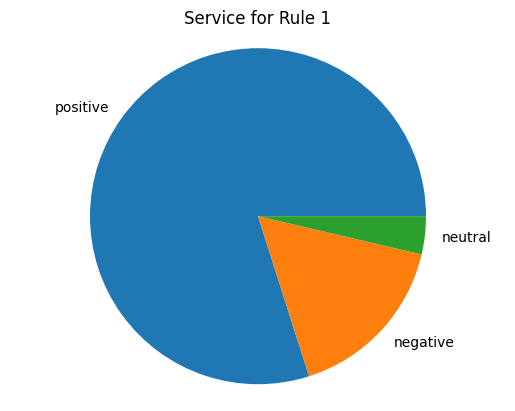

In [ ]:
#plotting the services for Rule 1
import matplotlib.pyplot as plt
service_result1 = result1["service"]
labels = []
sizes = []
for x, y in service_result1.items():
  labels.append(x)
  sizes.append(y)
plt.pie(sizes, labels=labels)
plt.title('Service for Rule 1')
plt.axis('equal')
plt.show()

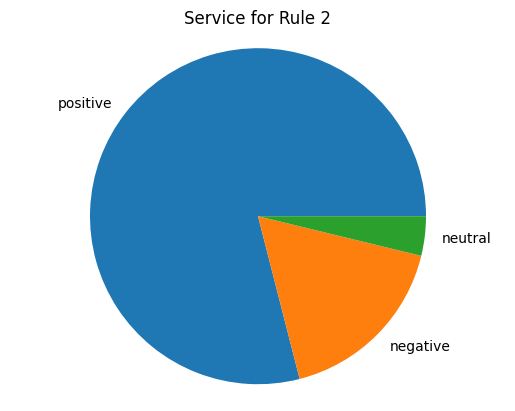

In [ ]:
#plotting the services for Rule 2
import matplotlib.pyplot as plt
service_result2 = result2["service"]
labels = []
sizes = []
for x, y in service_result2.items():
  labels.append(x)
  sizes.append(y)
plt.pie(sizes, labels=labels)
plt.title('Service for Rule 2')
plt.axis('equal')
plt.show()

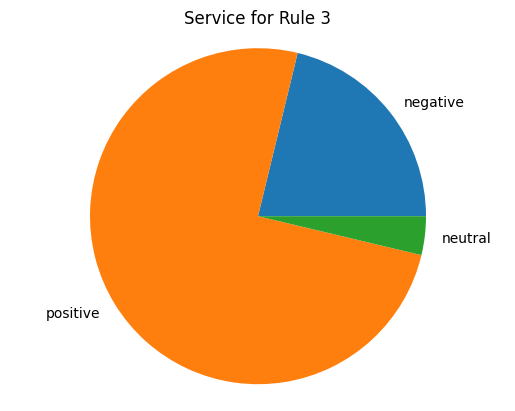

In [ ]:
#plotting the services for Rule 3
import matplotlib.pyplot as plt
service_result3 = result3["service"]
labels = []
sizes = []
for x, y in service_result3.items():
  labels.append(x)
  sizes.append(y)
plt.pie(sizes, labels=labels)
plt.title('Service for Rule 3')
plt.axis('equal')
plt.show()

Calculating the Precision and Recall Values

For Rule 1

In [ ]:
total_true_positive_rule1 = confusion_matrix_results["True_Positive"] ##should be 337
precision_value_for_rule1 = total_true_positive_rule1 / sentences_detected_positive * 100
print("The Precision Value for Rule 1:", precision_value_for_rule1, "%")
recall_value_for_rule1 = total_true_positive_rule1 / totalpositive_sentimentrule1 * 100
print("The Recall Value for Rule 1:", recall_value_for_rule1, "%")

The Precision Value for Rule 1: 18.78483835005574 %
The Recall Value for Rule 1: 34.2479674796748 %


For Rule 2

In [ ]:
total_true_positive_rule2 = confusion_matrix_results2["True_Positive"] ##should be 385
precision_value_for_rule2 = total_true_positive_rule2 / sentences_detected_positive * 100
print("The Precision Value for Rule 2:", precision_value_for_rule2, "%")
recall_value_for_rule2 = total_true_positive_rule2 / totalpositive_sentimentrule2 * 100
print("The Recall Value for Rule 2:", recall_value_for_rule2, "%")

The Precision Value for Rule 2: 21.460423634336678 %
The Recall Value for Rule 2: 35.981308411214954 %


For Rule 3

In [ ]:
total_true_positive_rule3 = confusion_matrix_results3["True_Positive"] ##should be 561
precision_value_for_rule3 = total_true_positive_rule3 / sentences_detected_positive * 100
print("The Precision Value for Rule 3:", precision_value_for_rule3, "%")
recall_value_for_rule3 = total_true_positive_rule3 / totalpositive_sentimentrule3 * 100
print("The Recall Value for Rule 3:", recall_value_for_rule3, "%")

The Precision Value for Rule 3: 31.270903010033447 %
The Recall Value for Rule 3: 40.681653372008704 %


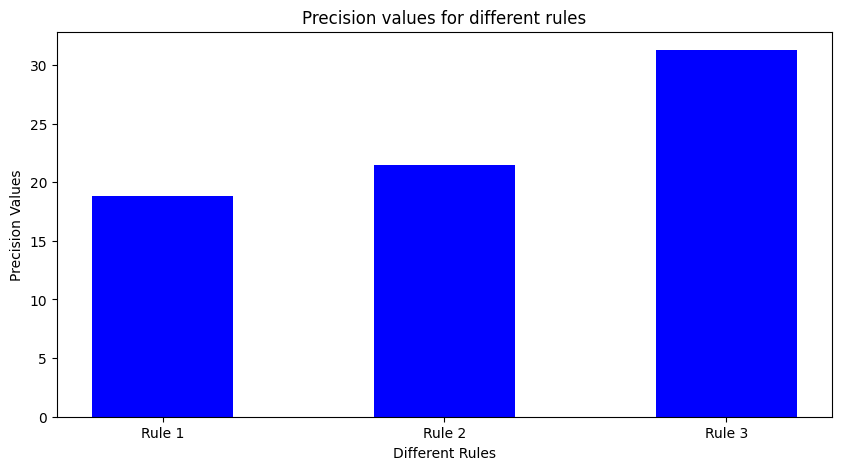

In [ ]:
data = {'Rule 1':precision_value_for_rule1, 'Rule 2':precision_value_for_rule2, 'Rule 3':precision_value_for_rule3,}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.5)

plt.xlabel("Different Rules")
plt.ylabel("Precision Values")
plt.title("Precision values for different rules")
plt.show()

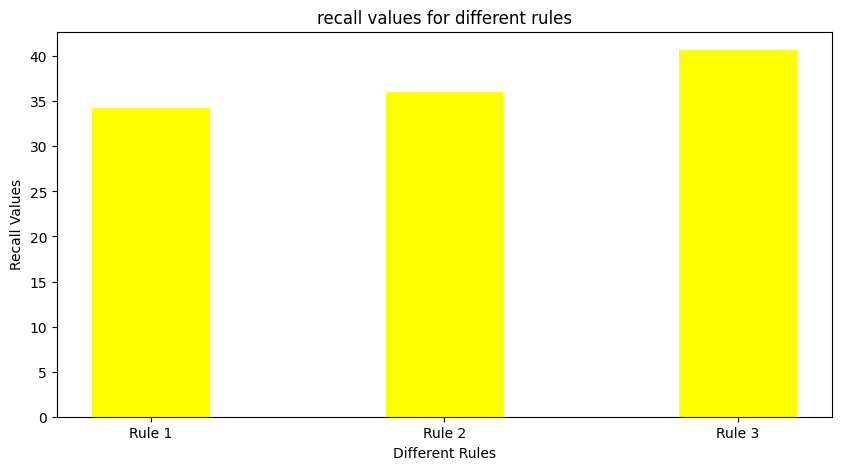

In [ ]:
data = {'Rule 1':recall_value_for_rule1, 'Rule 2':recall_value_for_rule2, 'Rule 3':recall_value_for_rule3,}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='yellow',
        width = 0.4)

plt.xlabel("Different Rules")
plt.ylabel("Recall Values")
plt.title("recall values for different rules")
plt.show()

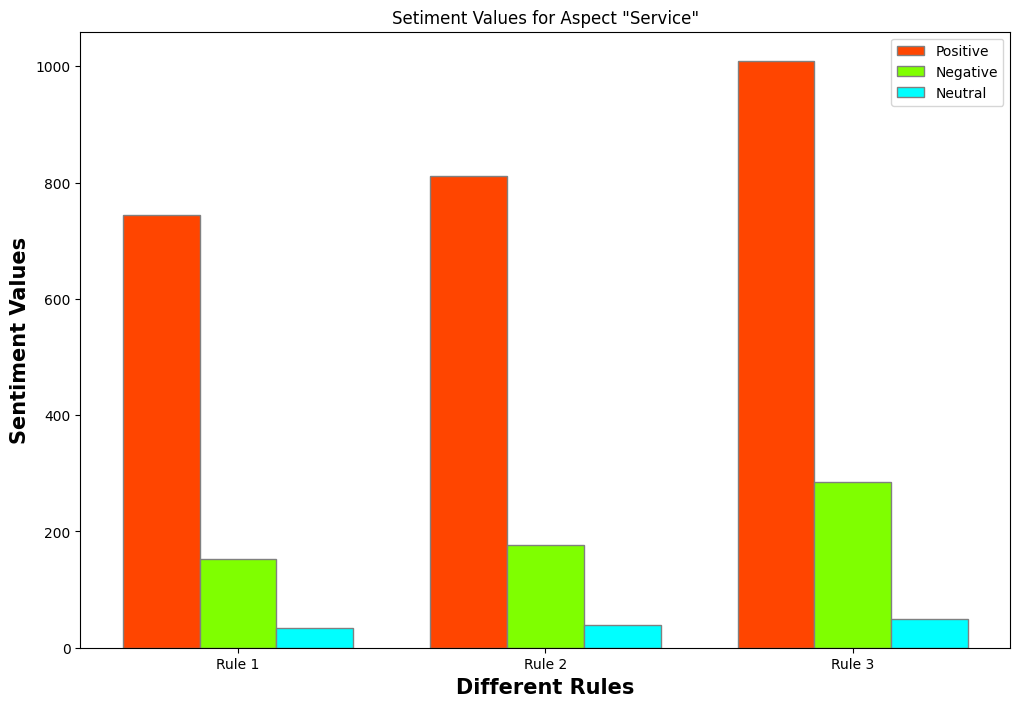

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
Positive = [744, 812, 1009]
Negative = [153, 177, 285]
Neutral = [34, 39, 50]

# Set position of bar on X axis
br1 = np.arange(len(Positive))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Positive, color ='orangered', width = barWidth,
        edgecolor ='grey', label ='Positive')
plt.bar(br2, Negative, color ='chartreuse', width = barWidth,
        edgecolor ='grey', label ='Negative')
plt.bar(br3, Neutral, color ='aqua', width = barWidth,
        edgecolor ='grey', label ='Neutral')

# Adding Xticks
plt.xlabel('Different Rules', fontweight ='bold', fontsize = 15)
plt.ylabel('Sentiment Values', fontweight ='bold', fontsize = 15)
plt.title('Setiment Values for Aspect "Service"')
plt.xticks([r + barWidth for r in range(len(Positive))],
        ['Rule 1', 'Rule 2', 'Rule 3'])

plt.legend()
plt.show()

Therefore the final precision and recall values for different rules are as follows:

**Rule 1**

The Precision Value for Rule 1: 18.7 %

The Recall Value for Rule 1: 34.2 %

**Rule 2**

The Precision Value for Rule 2: 21.4 %

The Recall Value for Rule 2: 35.9 %

**Rule 3**

The Precision Value for Rule 3: 31.2 %

The Recall Value for Rule 3: 40.6 %